**1.DATA EXPLORATION**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the data
data = pd.read_csv('/content/SocialMediaSentiment.csv')
data.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [3]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

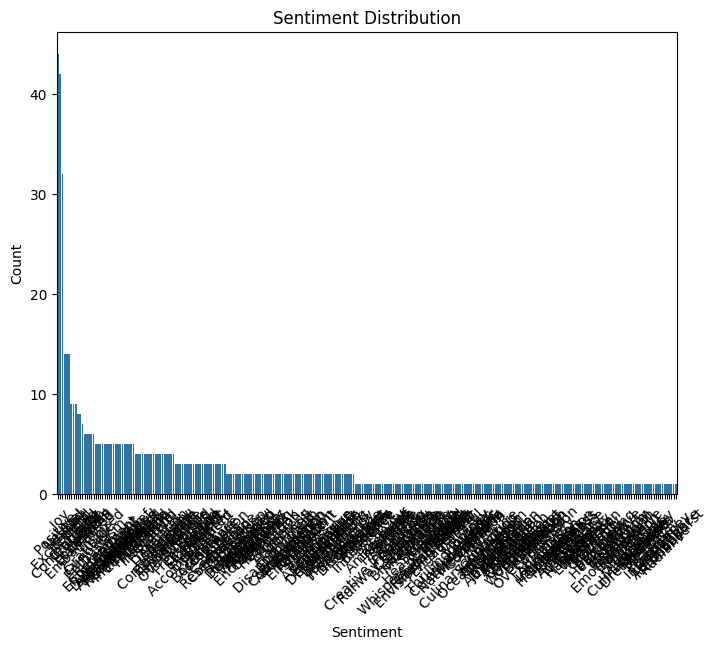

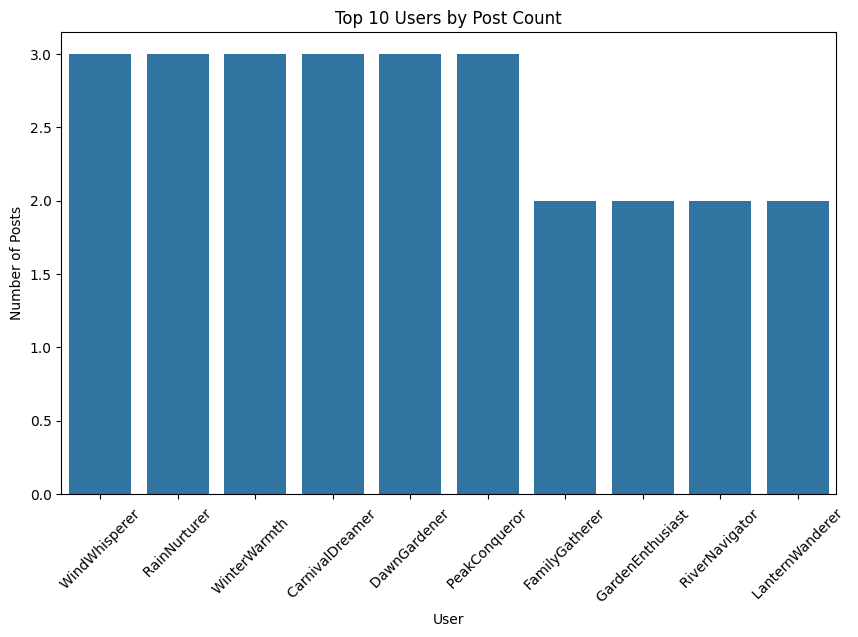

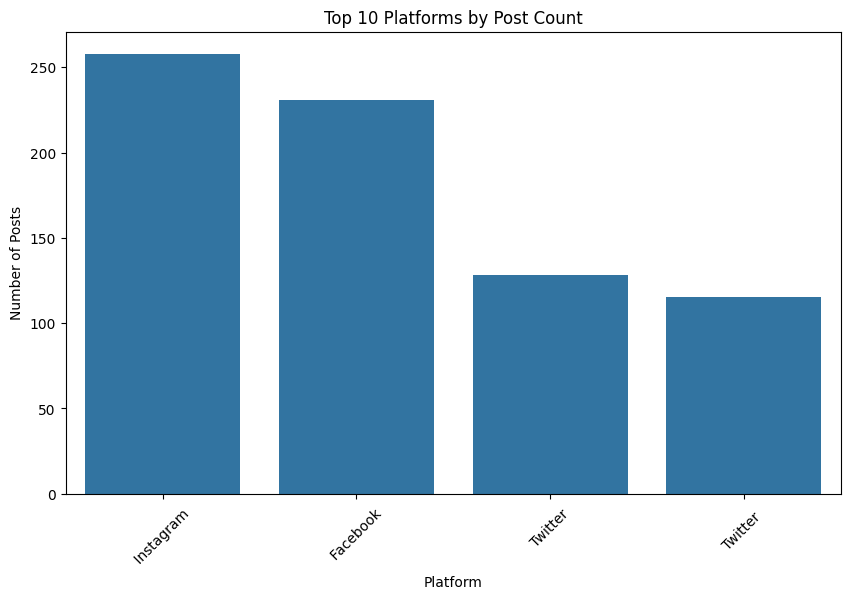

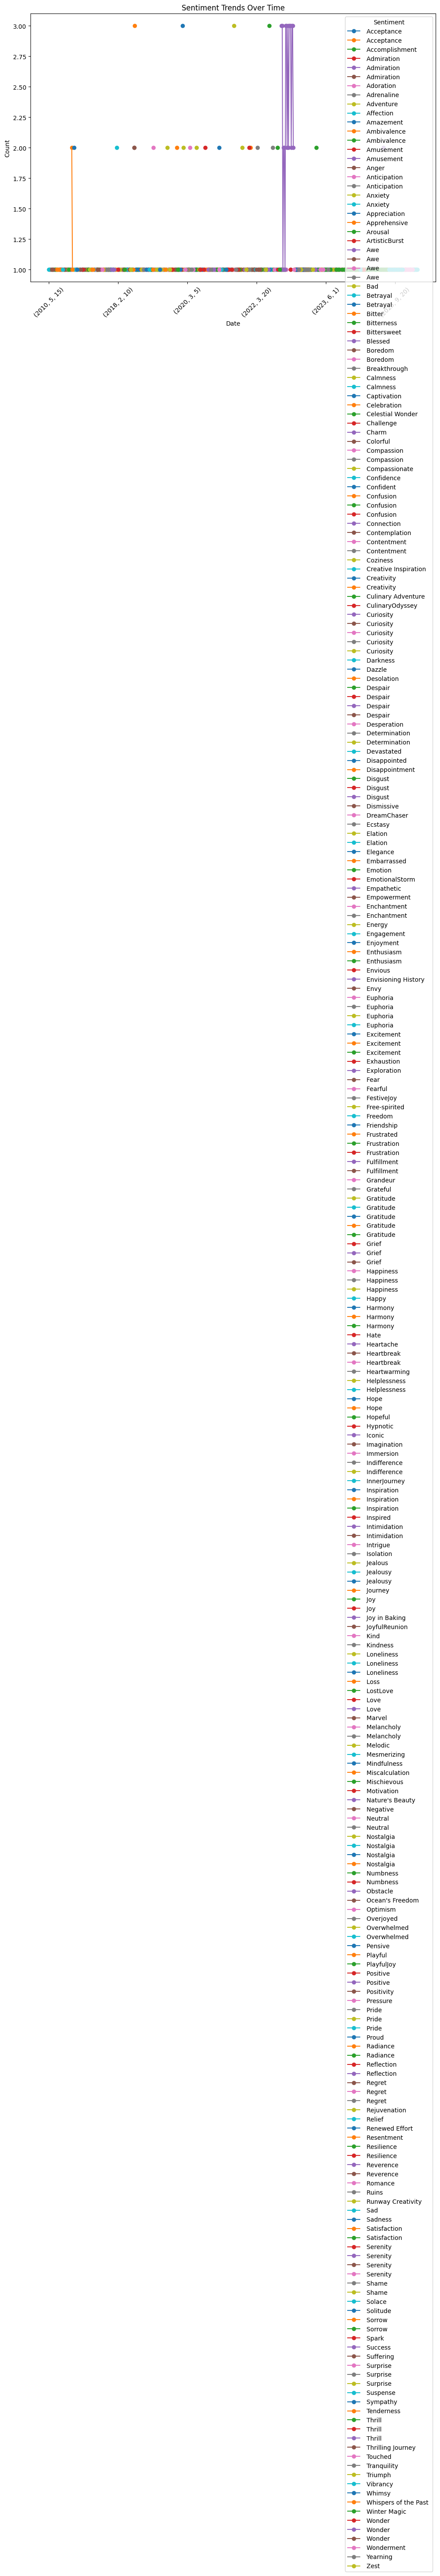

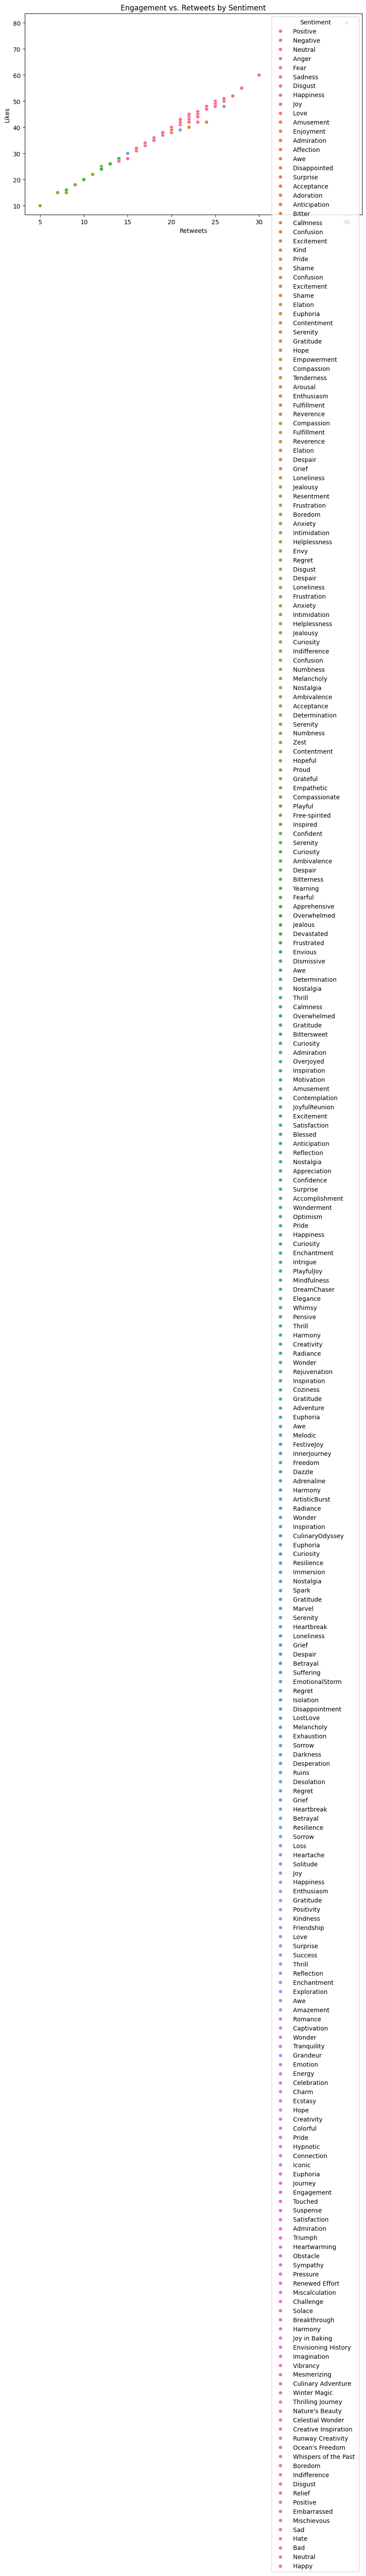

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


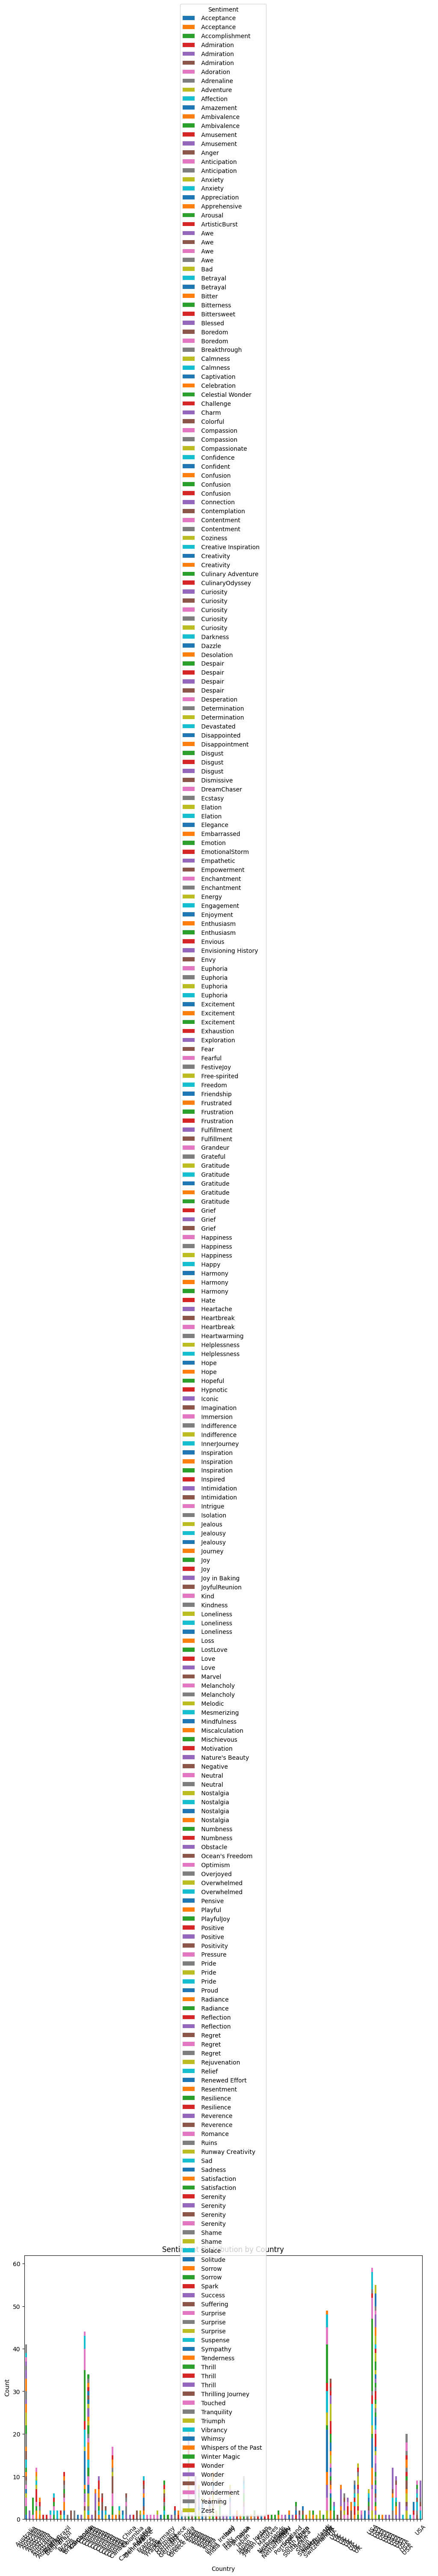

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/SocialMediaSentiment.csv')  # Replace 'your_dataset.csv' with your actual dataset path

# Basic data cleaning (handle missing values, data type conversions, etc.)
# Example:
# df.dropna(inplace=True)  # Drop rows with missing values

# Exploratory Data Analysis (EDA)

# Sentiment Distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# User and Platform Analysis
top_users = df['User'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.index, y=top_users.values)
plt.title('Top 10 Users by Post Count')
plt.xlabel('User')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

top_platforms = df['Platform'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_platforms.index, y=top_platforms.values)
plt.title('Top 10 Platforms by Post Count')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

# Time Analysis
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

sentiment_over_time = df.groupby(['Year', 'Month', 'Day'])['Sentiment'].value_counts().unstack(level=-1)
sentiment_over_time.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

# Engagement Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Retweets', y='Likes', hue='Sentiment', data=df)
plt.title('Engagement vs. Retweets by Sentiment')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.show()

# Geographic Analysis (if applicable)
# Removed extra space causing the IndentationError
country_sentiment_counts = df.groupby('Country')['Sentiment'].value_counts().unstack(level=-1)
country_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

**2.SENTIMENT ANALYSIS**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


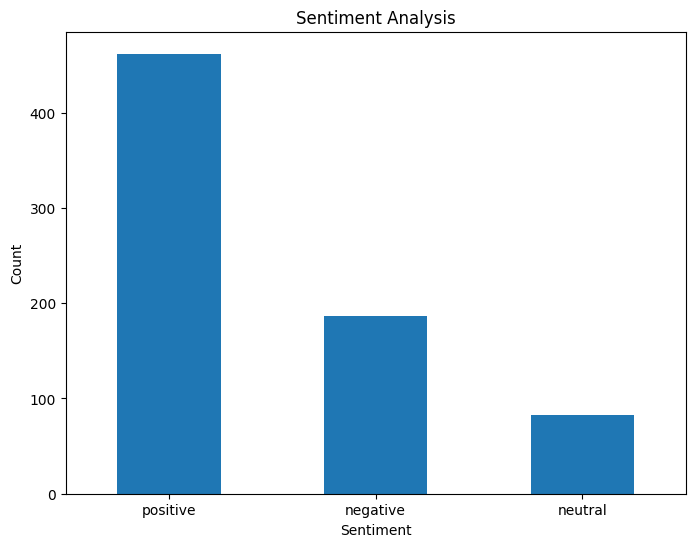

In [8]:
import nltk
nltk.download('vader_lexicon')

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/SocialMediaSentiment.csv')  # Replace 'your_dataset.csv' with your actual dataset path

# Initialize Vader Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each text in the dataset
df['Sentiment_Scores'] = df['Text'].apply(lambda text: sid.polarity_scores(text)['compound'])

# Assign sentiment labels based on the compound score
df['Sentiment_Label'] = df['Sentiment_Scores'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

# Aggregate sentiment counts
sentiment_counts = df['Sentiment_Label'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', rot=0)
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

**3.SENTIMENET TREND AND INSIGHTS**

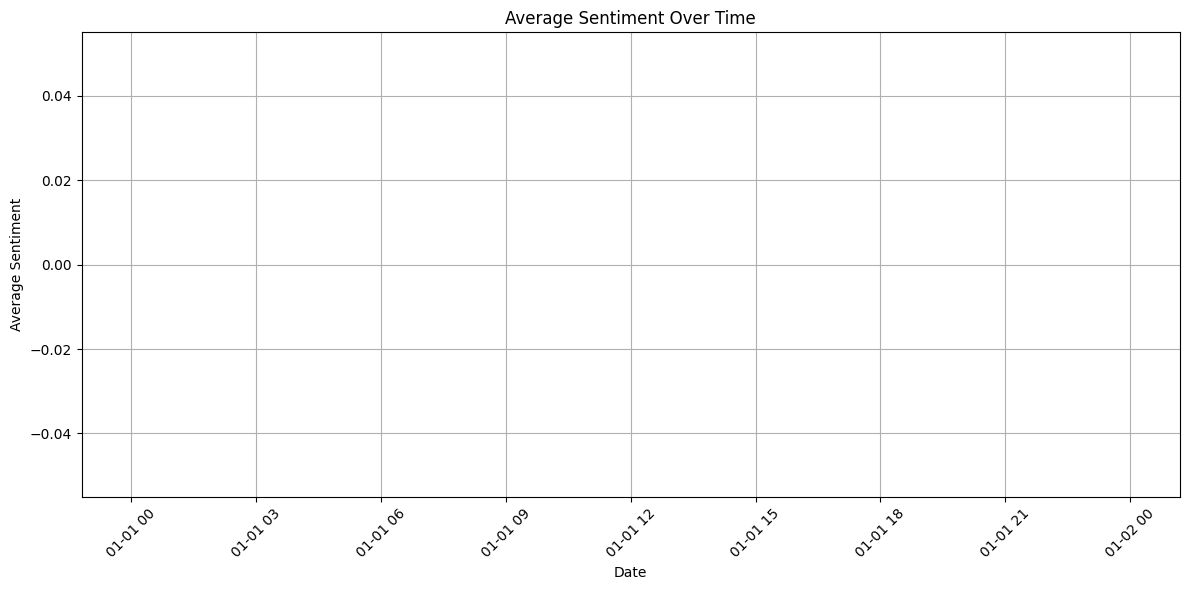

<ipython-input-10-35e4ad08741a>:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


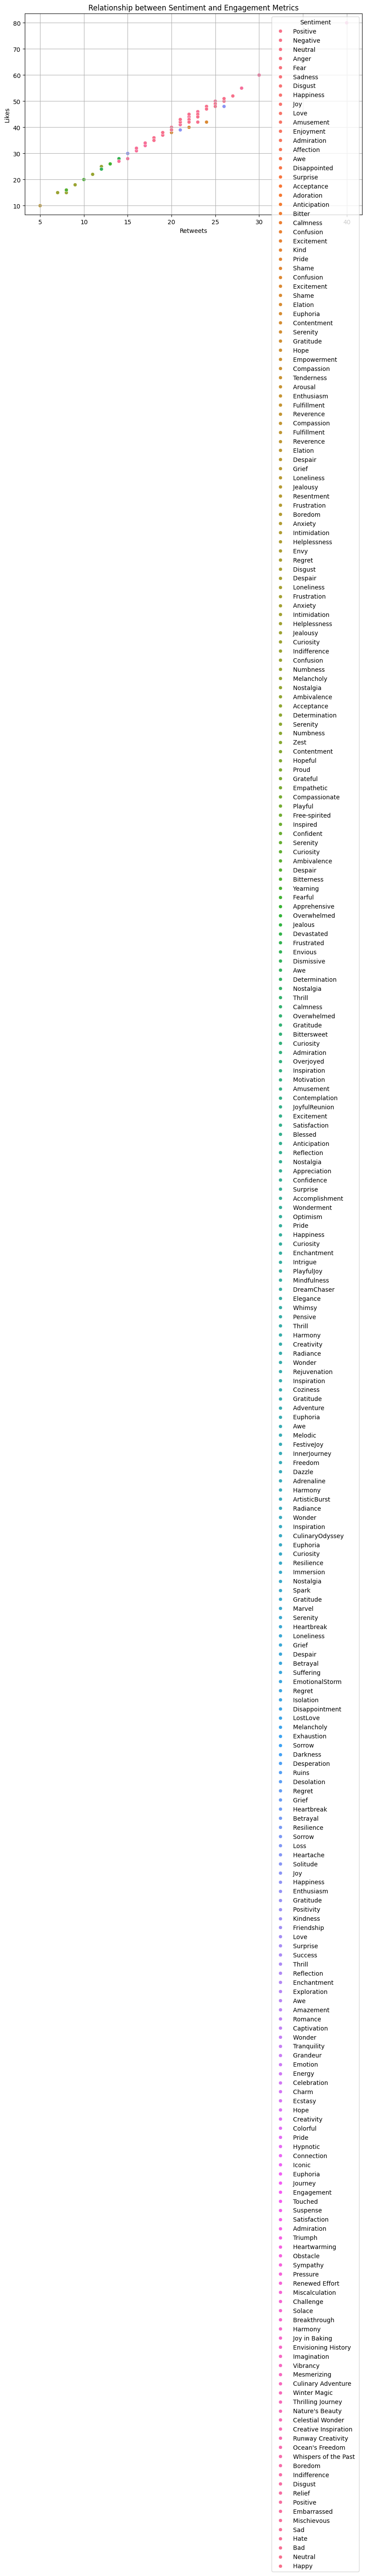

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/SocialMediaSentiment.csv')  # Replace 'your_dataset.csv' with your actual dataset path

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract date-related features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

# If 'Sentiment' is not numerical, consider converting it to a numerical representation
# For example, you can map sentiments to numerical values:
sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}  # Adjust as needed
df['Sentiment_Numeric'] = df['Sentiment'].map(sentiment_mapping)

# Sentiment Trends Over Time (using the numerical representation)
sentiment_over_time = df.groupby(['Year', 'Month', 'Day'])['Sentiment_Numeric'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=pd.to_datetime(sentiment_over_time[['Year', 'Month', 'Day']]), y=sentiment_over_time['Sentiment_Numeric'])
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Retweets', y='Likes', hue='Sentiment', data=df)
plt.title('Relationship between Sentiment and Engagement Metrics')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()

**4.ENGAGEMENT ANALYSIS**

<ipython-input-11-d0e2a9802949>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


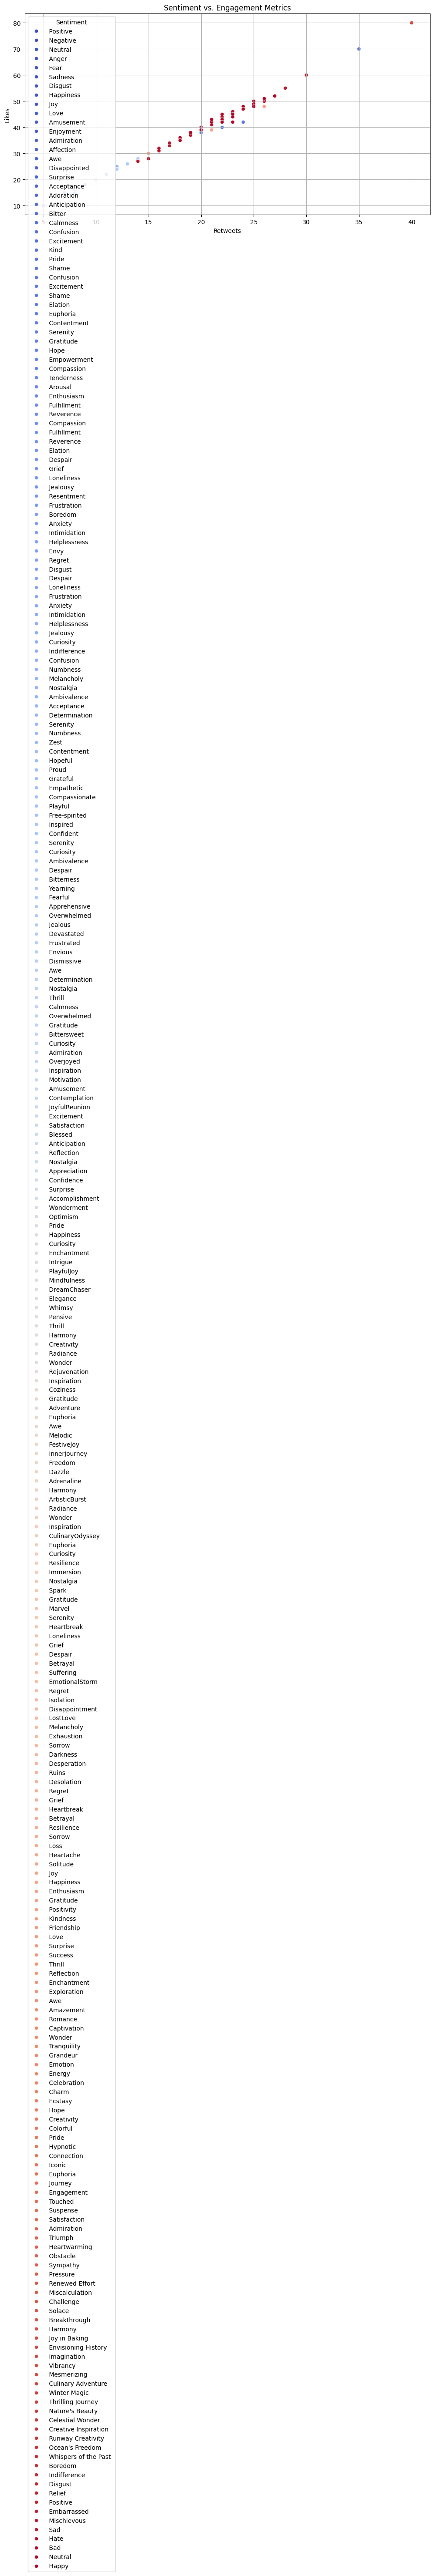


Average Engagement Metrics by Sentiment:
                    Retweets      Likes
Sentiment                              
 Acceptance        17.333333  35.000000
 Acceptance        16.800000  33.600000
 Accomplishment    26.000000  51.666667
 Admiration        22.000000  45.000000
 Admiration        20.000000  40.000000
...                      ...        ...
 Wonder            40.000000  80.000000
 Wonder            40.000000  80.000000
 Wonderment        35.000000  70.000000
 Yearning          10.000000  20.000000
 Zest              15.500000  31.000000

[279 rows x 2 columns]


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/SocialMediaSentiment.csv')  # Replace 'your_dataset.csv' with your actual dataset path

# Scatter plot of Sentiment vs. Retweets and Likes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Retweets', y='Likes', hue='Sentiment', data=df, palette='coolwarm')
plt.title('Sentiment vs. Engagement Metrics')
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()

# Average engagement metrics by sentiment
avg_engagement = df.groupby('Sentiment')[['Retweets', 'Likes']].mean()
print("\nAverage Engagement Metrics by Sentiment:")
print(avg_engagement)
